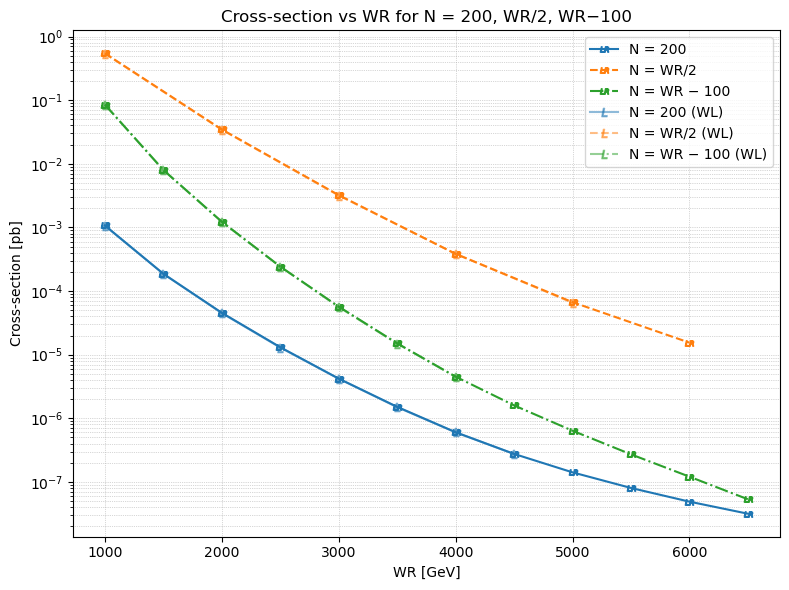

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. CSV 읽어오기 ───────────────────────────────────────────────────────────
# 실제 파일 경로를 본인의 환경에 맞게 수정하세요.
csv_path = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WR_WL_qq/tbchannel_crosssections.csv"
csv_path2 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WL_qq/tbchannel_crosssections.csv"
df = pd.read_csv(csv_path)
df2 = pd.read_csv(csv_path2)

# ─── 2. WR별로 조건에 맞는 N 값을 찾아서 별도 시리즈 생성 ────────────────────────
# 2-1) N = 200인 경우
df_N200 = df[df['N'] == 200].copy()
df2_N200 = df2[df2['N'] == 200].copy()
# 2-2) N = WR/2인 경우  → 즉 N * 2 == WR
df_WR2 = df[df['N'] * 2 == df['WR']].copy()
df2_WR2 = df2[df2['N'] * 2 == df2['WR']].copy()
# 2-3) N = WR - 100인 경우  → 즉 N == WR - 100
df_WR100 = df[df['N'] == df['WR'] - 100].copy()
df2_WR100 = df2[df2['N'] == df2['WR'] - 100].copy()
# ─── 3. WR값 오름차순으로 정렬 ───────────────────────────────────────────────────
df_N200   = df_N200.sort_values(by="WR")
df_WR2    = df_WR2.sort_values(by="WR")
df_WR100  = df_WR100.sort_values(by="WR")
df2_N200   = df2_N200.sort_values(by="WR")
df2_WR2    = df2_WR2.sort_values(by="WR")
df2_WR100  = df2_WR100.sort_values(by="WR")
# ─── 4. 한 플롯에 세 개의 곡선 그리기 ───────────────────────────────────────────
plt.figure(figsize=(8, 6))

# 4-1) N = 200
plt.plot(df_N200['WR'], df_N200['CrossSection'],
         marker='$LR$', linestyle='-', color='tab:blue', label='N = 200')
# 4-2) N = WR/2
plt.plot(df_WR2['WR'], df_WR2['CrossSection'],
         marker='$LR$', linestyle='--', color='tab:orange', label='N = WR/2')
# 4-3) N = WR - 100
plt.plot(df_WR100['WR'], df_WR100['CrossSection'],
         marker='$LR$', linestyle='-.', color='tab:green', label='N = WR − 100')

plt.plot(df2_N200['WR'], df2_N200['CrossSection'],
         marker='$L$', linestyle='-', color='tab:blue', label='N = 200 (WL)', alpha=0.5)
plt.plot(df2_WR2['WR'], df2_WR2['CrossSection'],
         marker='$L$', linestyle='--', color='tab:orange', label='N = WR/2 (WL)', alpha=0.5)
plt.plot(df2_WR100['WR'], df2_WR100['CrossSection'],
         marker='$L$', linestyle='-.', color='tab:green', label='N = WR − 100 (WL)', alpha=0.5)
# ─── 5. 그래프 꾸미기 ───────────────────────────────────────────────────────────
plt.xlabel('WR [GeV]')
plt.ylabel('Cross-section [pb]')
plt.title('Cross-section vs WR for N = 200, WR/2, WR−100')
plt.yscale('log')            # 필요에 따라 로그 스케일로 설정
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()

# ─── 6. 이미지 저장 및 표시 ────────────────────────────────────────────────────
# 파일로 저장하려면 uncomment:
# plt.savefig("/path/to/save/plot_crosssections.png", dpi=150)

plt.show()

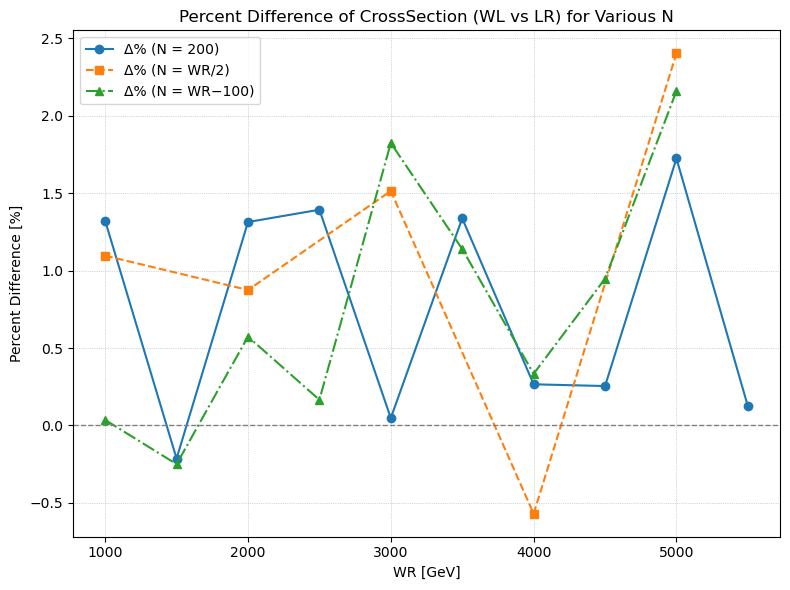

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. CSV 읽어오기 ───────────────────────────────────────────────────────────
csv_path1 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WR_WL_qq/tbchannel_crosssections.csv"
csv_path2 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WL_qq/tbchannel_crosssections.csv"
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)

# ─── 2. WR별로 조건에 맞는 N 값을 찾아서 별도 DataFrame 생성 ─────────────────────
# 2-1) N = 200인 경우
df1_N200 = df1[df1['N'] == 200].copy()
df2_N200 = df2[df2['N'] == 200].copy()

# 2-2) N = WR/2인 경우  → 즉 N * 2 == WR
df1_WR2 = df1[df1['N'] * 2 == df1['WR']].copy()
df2_WR2 = df2[df2['N'] * 2 == df2['WR']].copy()

# 2-3) N = WR - 100인 경우  → 즉 N == WR - 100
df1_WR100 = df1[df1['N'] == df1['WR'] - 100].copy()
df2_WR100 = df2[df2['N'] == df2['WR'] - 100].copy()

# ─── 3. 각 조건별로 DF 병합 후 퍼센트 차이 계산 ─────────────────────────────────
def compute_percent_diff(df_a, df_b):
    # 'WR'을 기준으로 inner join하여 두 개의 CrossSection 열을 가져옴
    merged = pd.merge(df_a[['WR', 'CrossSection']],
                      df_b[['WR', 'CrossSection']],
                      on='WR', suffixes=('_1', '_2'))
    # 퍼센트 차이 계산: (CS2 - CS1)/CS1 * 100
    merged['PercentDiff'] = (merged['CrossSection_1'] - merged['CrossSection_2']) / merged['CrossSection_2'] * 100
    return merged[['WR', 'PercentDiff']]

pd_N200_diff = compute_percent_diff(df1_N200, df2_N200)
pd_WR2_diff = compute_percent_diff(df1_WR2, df2_WR2)
pd_WR100_diff = compute_percent_diff(df1_WR100, df2_WR100)

# ─── 4. 퍼센트 차이 플롯 ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))

# N = 200인 경우
plt.plot(pd_N200_diff['WR'], pd_N200_diff['PercentDiff'],
         marker='o', linestyle='-', color='tab:blue', label='Δ% (N = 200)')

# N = WR/2인 경우
plt.plot(pd_WR2_diff['WR'], pd_WR2_diff['PercentDiff'],
         marker='s', linestyle='--', color='tab:orange', label='Δ% (N = WR/2)')

# N = WR - 100인 경우
plt.plot(pd_WR100_diff['WR'], pd_WR100_diff['PercentDiff'],
         marker='^', linestyle='-.', color='tab:green', label='Δ% (N = WR−100)')

# 그래프 꾸미기
plt.xlabel('WR [GeV]')
plt.ylabel('Percent Difference [%]')
plt.title('Percent Difference of CrossSection (WL vs LR) for Various N')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')  # 기준선 (0%) 표시
plt.legend()
plt.tight_layout()

# 이미지 저장 (필요 시)
# plt.savefig("/path/to/save/percent_diff_plot.png", dpi=150)

plt.show()